In [2]:
#https://chrisalbon.com/statistics/frequentist/demonstrate_the_central_limit_theorem/
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#Authenticate and create pydrive client

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 4.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
link='https://drive.google.com/open?id=1JpJis25voH1m9wWcgM2BzTTC_co2HSiT'
fluff, id  = link.split("=")

In [4]:
import pandas as pd
downloaded = drive.CreateFile({"id":id})
downloaded.GetContentFile('formatted_flights.csv')
flights = pd.read_csv('formatted_flights.csv')
flights.head()

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.


**Central Limit Theorum**

**1.   The sampling distribution of the mean will be less spread than the values in the population from which the sample is drawn.**


**2.   The sampling distribution will be well-modeled by a normal distribution (and it will get closer with the larger sample sizes). **


**3.   The spread of the sample distribution is related to the spread of the population values( pop_mean = mean,   sampl_std = pop_std/sqrt(n)).**


**4.   The bigger sample lead to smaller spread in the sampling distribution(self-evident from the equation above)**





mean  1.2971432896160044
std  29.064401023259187


(array([  731.,  3059.,  9838., 25861., 50812., 62100., 51650., 34469.,
        21769., 14056.,  9919.,  7240.,  5680.,  4541.,  3712.,  3149.,
         2593.,  2300.,  1887.,  1747.]),
 array([-60., -51., -42., -33., -24., -15.,  -6.,   3.,  12.,  21.,  30.,
         39.,  48.,  57.,  66.,  75.,  84.,  93., 102., 111., 120.]),
 <a list of 20 Patch objects>)

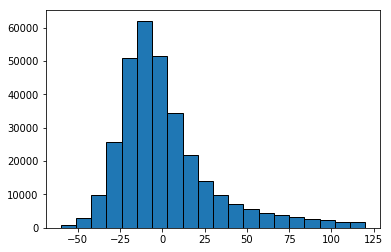

In [13]:
delays= flights['arr_delay']
mean = delays.mean()
std = delays.std()
print("mean ", mean)
print("std ", std)
plt.hist(delays,bins=20, edgecolor='black')

In [0]:
sampled_means = []

#Sample size = 50

for i in range(0,1000):
  sampled_means.append(delays.sample(n=50).mean())
  

sample mean 1.2094400000000005 sample std 4.068269718799988


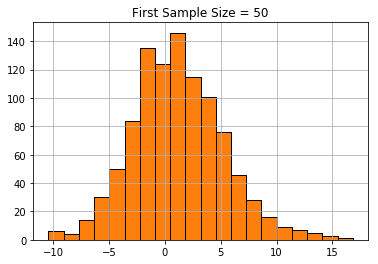

In [7]:
import matplotlib.pyplot as plt
sample = pd.Series(sampled_means)
s = plt.hist(sample,bins=20, edgecolor='black')
plt.title('First Sample Size = 50')

#_1_ = pd.Series(sampled_means).hist(bins=20,edgecolor='black')

pd.Series(sampled_means).hist(bins=20,edgecolor='black')
sample_mean = pd.Series(sampled_means).mean()
sample_std = pd.Series(sampled_means).std()

print('sample mean', sample_mean, "sample std", sample_std)

In [0]:
sampled_means2 = []

#Sample size = 100

for i in range(0,1000):
  sampled_means2.append(delays.sample(n=100).mean())
  

sample mean 1.353119999999998 sample std 2.908824973821615


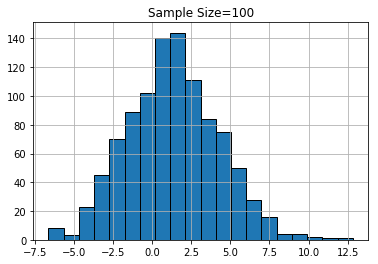

In [9]:
_2_ = pd.Series(sampled_means2).hist(bins=20,edgecolor='black')
_2_.set_title('Sample Size=100')
sample_mean = pd.Series(sampled_means2).mean()
sample_std = pd.Series(sampled_means2).std()

print('sample mean', sample_mean, "sample std", sample_std)

In [0]:
sampled_means3 = []

#Sample size = 150

for i in range(0,1000):
  sampled_means3.append(delays.sample(n=150).mean())

sample mean 1.3576266666666665 sample std 2.3433385876476707


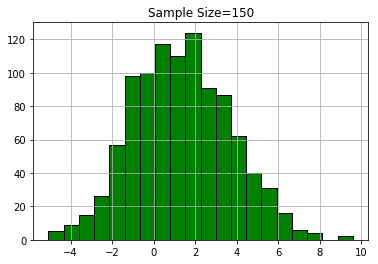

In [11]:
_3_ = pd.Series(sampled_means3).hist(bins=20,color='green', edgecolor='black')
_3_.set_title('Sample Size=150')
sample_mean = pd.Series(sampled_means3).mean()
sample_std = pd.Series(sampled_means3).std()

print('sample mean', sample_mean, "sample std", sample_std)

All three sample sizes plotted together


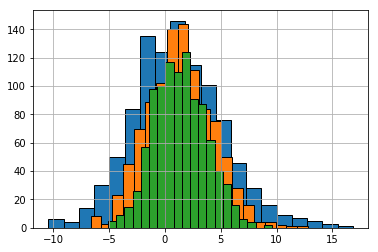

In [12]:
_1_ = pd.Series(sampled_means).hist(bins=20,edgecolor='black')
_2_ = pd.Series(sampled_means2).hist(bins=20,edgecolor='black')
_3_ = pd.Series(sampled_means3).hist(bins=20,edgecolor='black')
print("All three sample sizes plotted together")

#Population
mean  1.2971432896160044

std  29.064401023259187

#sample size = 150                                     
mean 1.36
std  2.34                            


###     29/sqrt(150) = 2.3728

### The sampled means follow the normal distribution and have a lessing spread as the sample sizes increase.  Everything that Central Limit Theorum states can be easily displayed by this workbook.  

